In [5]:
source('/home/meisl/Workplace/neuroblastoma/immune/NB.immune.atlas/lib.r')


In [4]:
load('F2.myeloid.RData')


In [8]:
anoM  =as.factor(anoM)
anoM.pal <- setNames(sample(rainbow(length(levels(anoM)))),levels(anoM));
anoM.pal['mDC-CLEC9A']='cyan'
anoM.palf <- function(n) return(anoM.pal)


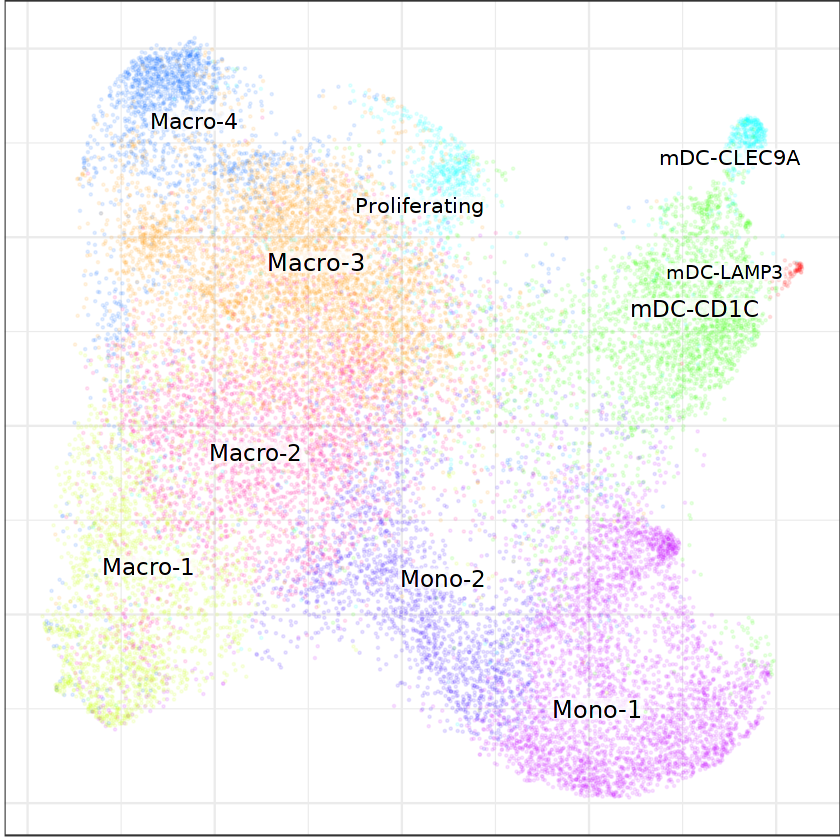

In [9]:
a2=con$plotGraph(groups=anoM,plot.na=F,palette=anoM.palf,size=0.25,alpha=0.1,font.size = c(4, 5))
a2
#ggsave('Myeloid.pdf',a2,height=4,width=4)


In [11]:
# read priviate data only
#con.ninb=readRDS('raw.myeloid.v2_conos.rds')


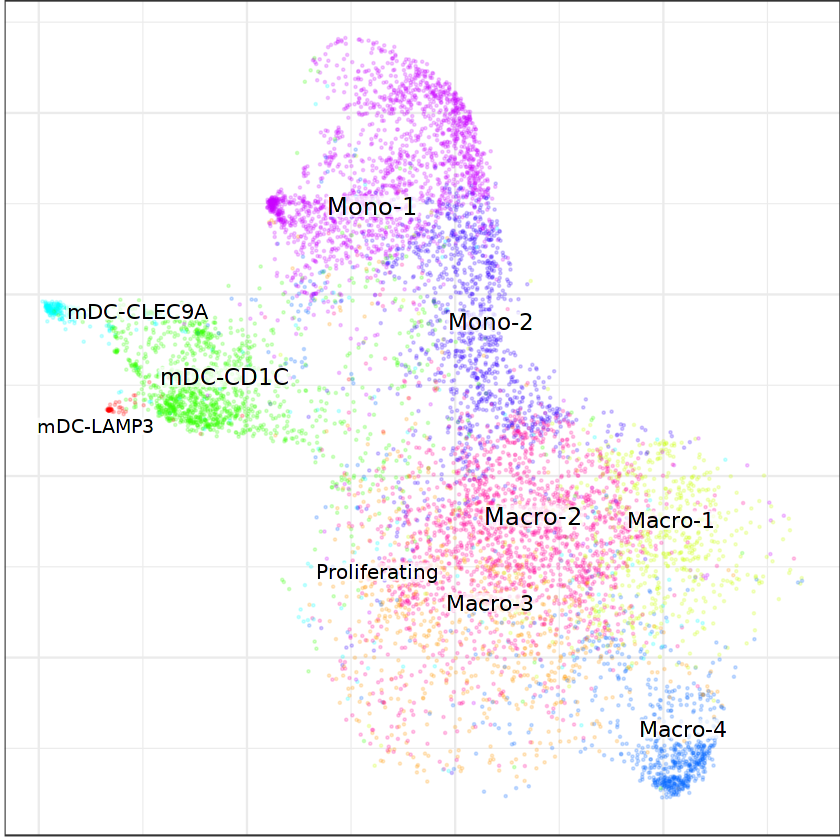

In [12]:
a3=con.ninb$plotGraph(groups=anoM,plot.na=F,palette=anoM.palf,size=0.25,alpha=0.2,font.size = c(4, 5.))
a3

In [13]:
fraction.palette1 = c('grey','yellow','purple','red')
names(fraction.palette1) = c('Adrenal','Low risk','Intermediate risk','High risk')

In [14]:
samp = con$getDatasetPerCell() %>% Toch()
samp=samp[samp %in% names(ss)]
table(samp)

cname.ninib = intersect(names(samp),names(anoM))
length(cname.ninib)  

anoM.ninib = anoM[cname.ninib]

anoM.ninib=anoM.ninib[anoM.ninib!='Proliferating']

table(anoM.ninib)

samp
NB02 NB09 NB11 NB12 NB13 NB15 NB16 NB17 NB18 NB19 NB20 NB23 NB24 NB26 NB34 NB37 
 330  374  274  483 2810  310  145  309  230  826  139  545 1432   60  380  151 

[1] 8715

anoM.ninib
      Macro-1       Macro-2       Macro-3       Macro-4      mDC-CD1C 
          652          1836           705           773          1367 
   mDC-CLEC9A     mDC-LAMP3        Mono-1        Mono-2 Proliferating 
          228            51          1899          1118             0 

[1]    35 20792


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




[1] "blue"
[1] "white"
[1] "red"


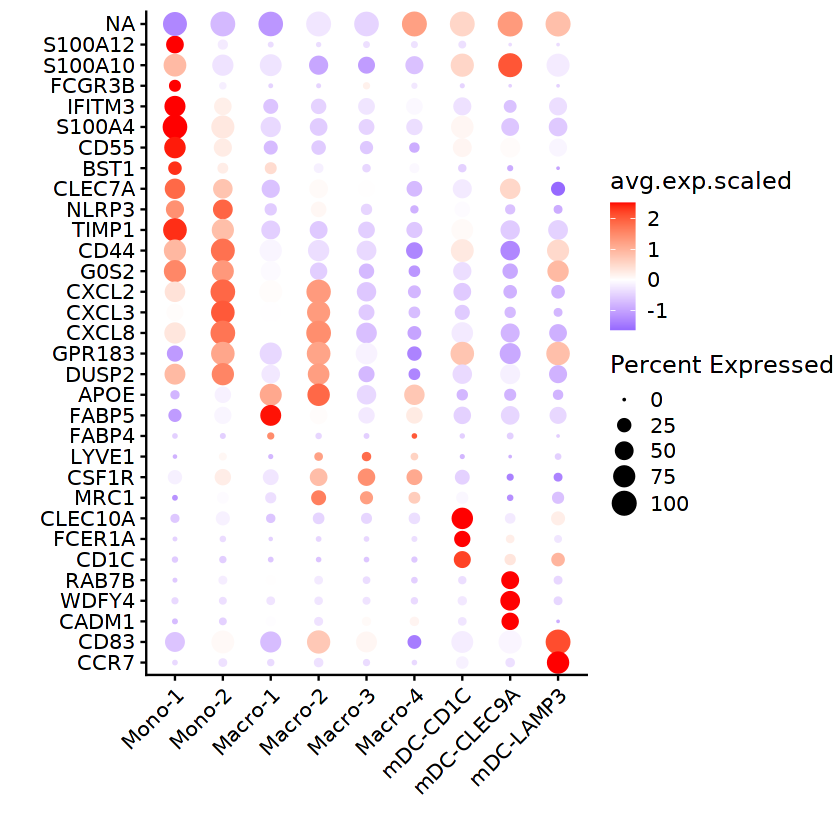

In [15]:
genes= c('S100A12','S100A10','FCGR3B','IFITM3','S100A4','CD55','BST1','CLEC7A','NLRP3','NLRP3','NLRP3','NLRP3',
      'TIMP1','CD44','G0S2',
      'CXCL2','CXCL3','CXCL8','GPR183','DUSP2',
      'APOE','FABP5','FABP4',
      'LYVE1','CSF1R','MRC1',
      'CLEC10A','FCER1A','CD1C','HLA-DRA',
      'RAB7B','WDFY4','CADM1','CD83',
      'CCR7')


annot = as.factor(anoM.ninib)
annot = ordered(annot,levels=c('Mono-1','Mono-2',"Macro-1","Macro-2" ,'Macro-3','Macro-4','mDC-CD1C'    ,     "mDC-CLEC9A"     ,     "mDC-LAMP3" ))


exp <- do.call(rbind,lapply(sn(genes),function(gene) conos:::getGeneExpression(con,gene)))
exp[is.na(exp)]=0
exp  = exp[rowMeans(exp)!=0,]
dim(exp)

genes = intersect(genes,rownames(exp))


library(cowplot)
cname=names(annot)
cname = intersect(cname,colnames(exp))
p=Dotfig(genes,exp[,cname],annot[cname],cols = c("blue","white", "red"))+xlab('')+ylab('')
p


Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Macro-1,F106,0.064085447
2,Macro-2,F106,0.113484646
3,Macro-3,F106,0.360480641
4,Macro-4,F106,0.044058745
5,mDC-CD1C,F106,0.145527370
6,mDC-CLEC9A,F106,0.009345794


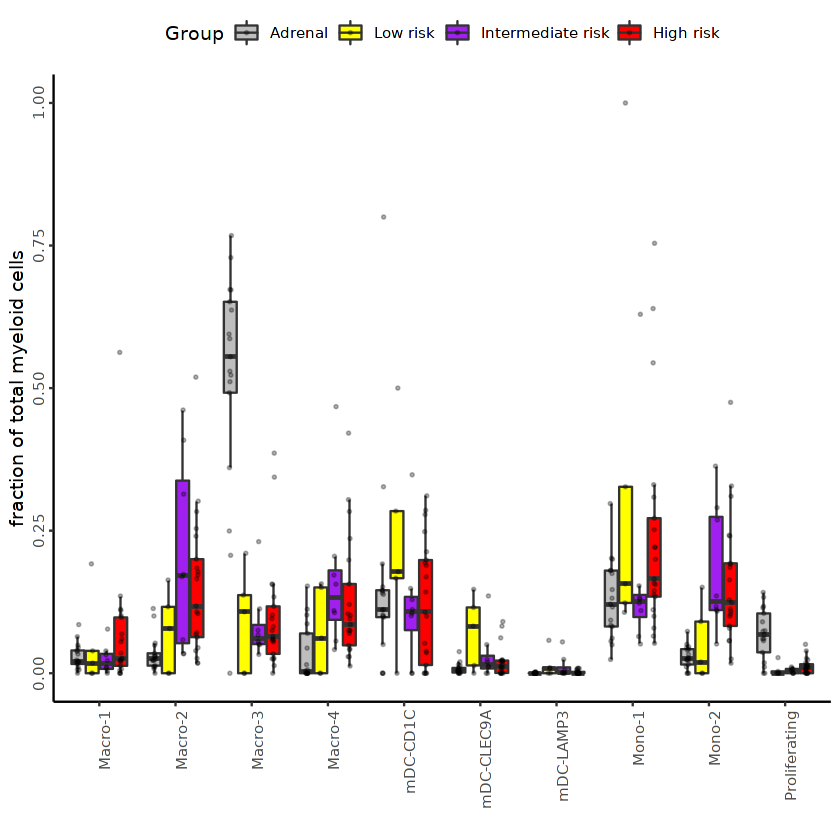

In [16]:
ssamp = con$getDatasetPerCell()
cname=names(anoM)
ano2=data.frame('Cell'=anoM[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups2[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total myeloid cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p

#ggsave('myeloid.fraction.v2.pdf',p,height=3.8,width=4.7)


In [17]:

library(ggpubr)

df=tmp4
rsig=NULL
for (i in unique(df[,1])){
  tmp=df[df[,1]==i,]

  sig=compare_means(pc.of.sample ~ Group,  data = tmp) # 
  sig$cell=i
  rsig=rbind(rsig,sig)
  #sig[sig$p.signif!='ns',]
}

#write.table(rsig,'fraction.1.pvalue.xls',sep='\t',col.names=T,row.names=F,quote=F)

In [18]:
ssamp = con$getDatasetPerCell() %>% Toch()
fres = estimateCellDensityKde(con$embedding, sample.per.cell=Toch(ssamp), sample.groups = as.factor(sample.groups2)[unique(ssamp)]  , bins = 400, bandwidth=0.05, expansion.mult=0.05)
dens.res = fres


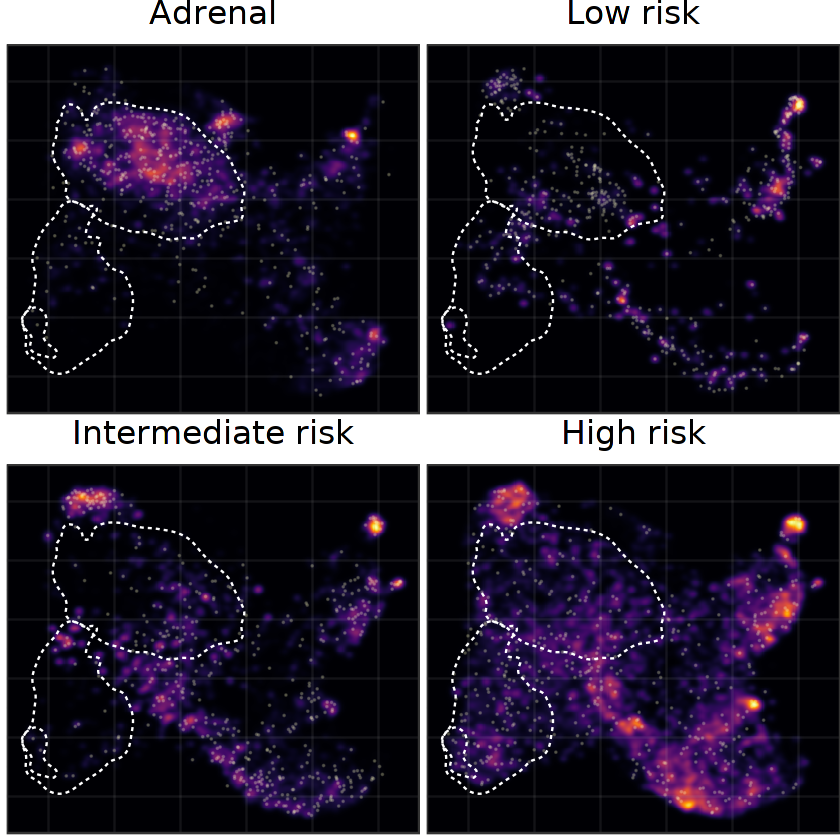

In [29]:

density.figure2 = function(con,dens.res,sample.groups2,anoM,countour = countour,show.legend =TRUE,point.col = '#FCFDBFFF'){
  
  cond.densities = dens.res$cond.densities
  color.range = parseLimitRange(unlist(dens.res$cond.densities)) %>% range()
  
  pl = lapply(sn(names(cond.densities)), function(l) {
    
    df = data.frame(dens.res$density.emb, z=cond.densities[[l]])
    condition.per.cell = getConditionPerCell(ssamp,as.factor(sample.groups2)[unique(ssamp)])
    
    p <- plotDensityKde(df,bins=dens.res$bins, lims=color.range, title=l, show.legend=show.legend,
                        show.grid=TRUE, plot.theme=plot.theme)
    
    emb <- as.data.frame(con$embedding) %>% set_colnames(c('x','y')) %>% cbind(z=1)
    nnames <- condition.per.cell %>% {names(.)[. == l]} %>% sample(min(500, length(.)))
    p <- p + geom_point(data=emb[nnames, ], aes(x=x, y=y), col=point.col, size=0.00001, alpha=0.2)
    
    if (!is.null(countour)){
      cn.geoms = getDensityContours(con$embedding,cell.groups =anoM ,group=countour)
      p = p + do.call(c,cn.geoms)
    }
    p
    
  })
  return(pl)
}
library(magrittr)
pl = density.figure2(con,dens.res,sample.groups2,anoM,countour = c('Macro-1','Macro-3','Macro-4'),show.legend =FALSE,point.col = '#FCFDBFFF')


b=  cowplot::plot_grid(plotlist=pl, ncol=2, nrow=2)
b


#ggsave('myeloid.density.new.pdf',height=6.4,width=6)


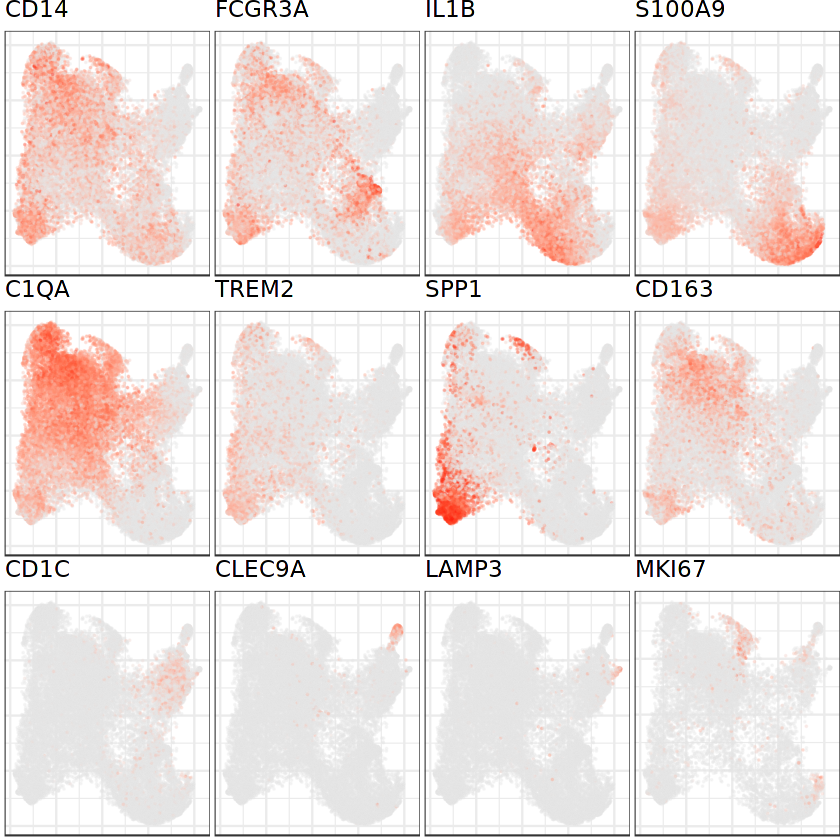

In [30]:
gs = c('CD14','FCGR3A','IL1B','S100A9','C1QA','TREM2','SPP1','CD163','CD1C','CLEC9A','LAMP3','MKI67')
pl = lapply(sn(gs),function(x) con$plotGraph(gene=x,title=x,size=0.03,alpha=0.3,plot.na=F))

b=  cowplot::plot_grid(plotlist=pl, ncol=4, nrow=3)
b

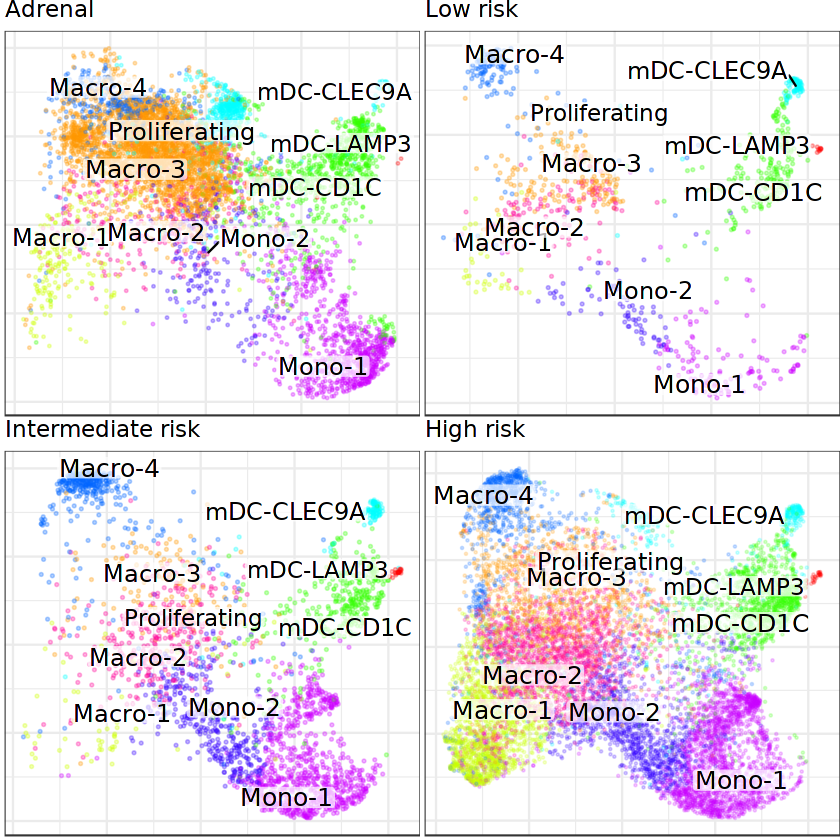

In [31]:
sample.g2 = sample.groups2[unique(ssamp)]

n1 = names(sample.g2[sample.g2=='High risk'])
a4=con$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.25,alpha=0.2,font.size = c(4.8, 5.2),title='High risk')


n1 = names(sample.g2[sample.g2=='Intermediate risk'])
a3=con$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.45,alpha=0.3,font.size = c(4.8, 5.2),title='Intermediate risk')


n1 = names(sample.g2[sample.g2=='Low risk'])
a2=con$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.45,alpha=0.3,font.size = c(4.8, 5.2),title='Low risk')


n1 = names(sample.groups2[sample.groups2=='Adrenal'])
a1=con$plotGraph(groups = anoM[names(ssamp[ssamp %in% n1])],plot.na=F,palette=anoM.palf,size=0.35,alpha=0.3,font.size = c(4.8, 5.2),title='Adrenal')

b=  cowplot::plot_grid(plotlist=list(a1,a2,a3,a4), ncol=2, nrow=2)
b

In [32]:
appname = 'Mac'
t.ano2 = anoM[grepl(appname,anoM)] %>% Toch()
table(t.ano2)



DEheatmap(sp2,t.ano2,t.ano2,appname)

t.ano2
Macro-1 Macro-2 Macro-3 Macro-4 
   2045    2782    4413    1807 

Warning message in p2myeloid$getDifferentialGenes(groups = conosCluster):
“cluster vector doesn't specify groups for all of the cells, dropping missing cells from comparison”


In [53]:

anof2 = anoM


anof2 = ordered(anof2,levels=c('Mono-1','Mono-2',"Macro-1"     ,        "Macro-2" ,'Macro-3','Macro-4'  ,'mDC-CD1C'    ,     "mDC-CLEC9A"     ,     "mDC-LAMP3" ,'Proliferating'))

features = c('FCN1','S100A8','S100A12','C1QA','CD163','APOC1','TREM2','APOE','CD1C','CLEC9A','LAMP3','MKI67')
features = intersect(features,colnames(sp2$counts))

cname = intersect(names(anof2),rownames(sp2$counts))

stacked.plot(anof2[cname],features,t(sp2$counts),anoM.pal,'F3.myeloid.violin.pdf')



In [36]:
ssamp = con$getDatasetPerCell() %>% Toch()
stype = getConditionPerCell(ssamp,as.factor(sample.groups2)[unique(ssamp)]) 
table(stype)

stype
          Adrenal         High risk Intermediate risk          Low risk 
             6305             10902              2620               965 

In [38]:
anoM2 = anoM[grepl('Macro-|Mono',anoM)] %>% Toch() %>%  as.factor()
stype= Toch(stype)

stype  =as.factor(stype)


stype  =as.factor(stype)
stype = ordered(stype,levels=c("Adrenal","Low risk"  ,"Intermediate risk","High risk"  ))


In [39]:
source('/home/meisl/bin/DEheat.R')


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02372 0.04670 0.05505 0.07664 0.35728 


Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width un

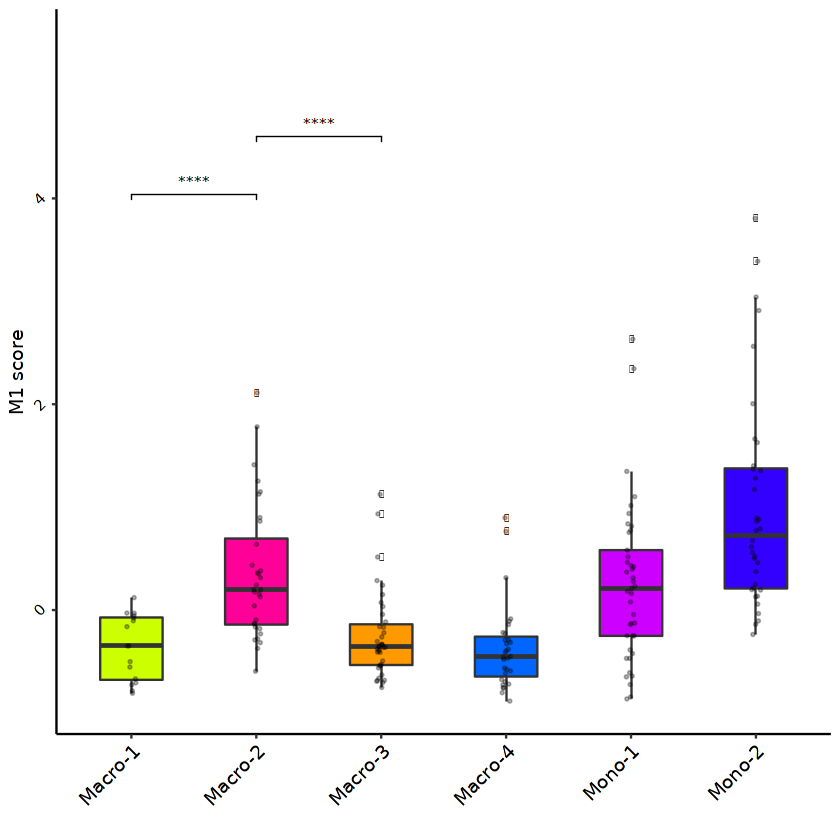

In [41]:
cname = intersect(names(stype),names(anoM2))
anoM2 = anoM2[cname]
ylab='M1 score'
cname=names(anoM2)
#cname = stype[cname] %>% .[.!='Adrenal'] %>% names()



gs=glist$M1

gs = intersect(gs,colnames(sp2$counts))

df=Signature_score(anoM2[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=10,magnitude.normal = TRUE)
p1=drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.45,height=2.5,width=2.4,sigl=c('Macro-1', 'Macro-2', 'Macro-3'))

p1


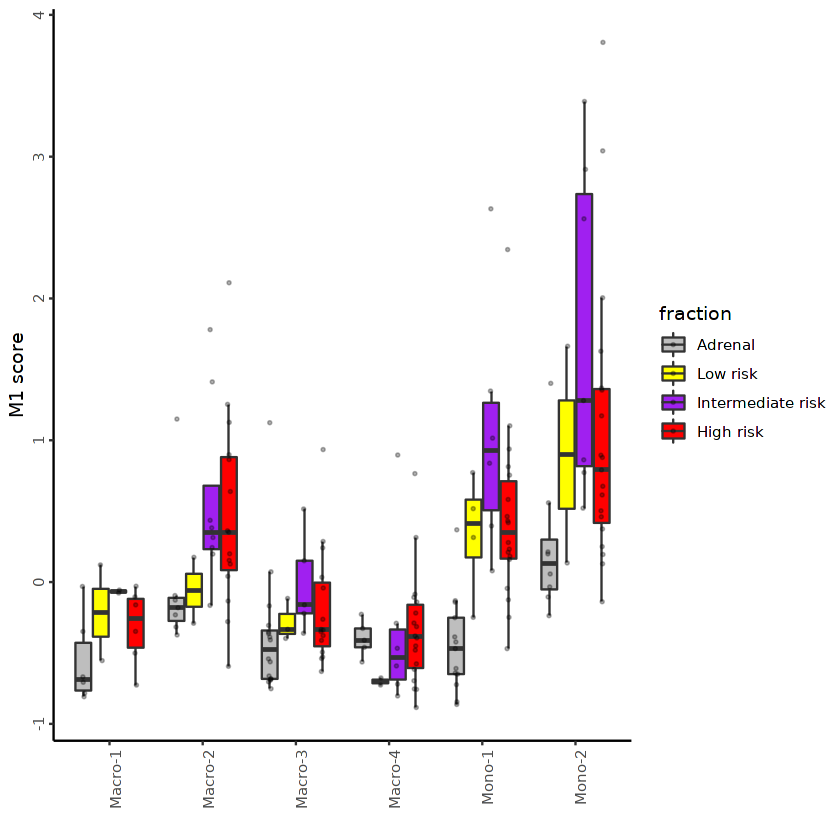

In [42]:
p <- ggplot(na.omit(df),aes(x=cell,y=score,dodge=fraction,fill=fraction))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+theme(legend.position="right")+
  scale_fill_manual(values=fraction.palette1)#+
# scale_y_continuous( expand=c(0, max(df$score) * 0.1), limits=c(0, (max(df$score) + max(df$score) * 0.05 )))  #expand=c(0, 0),

p1=p#+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.04877 0.08221 0.08633 0.12052 0.24857 


Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width un

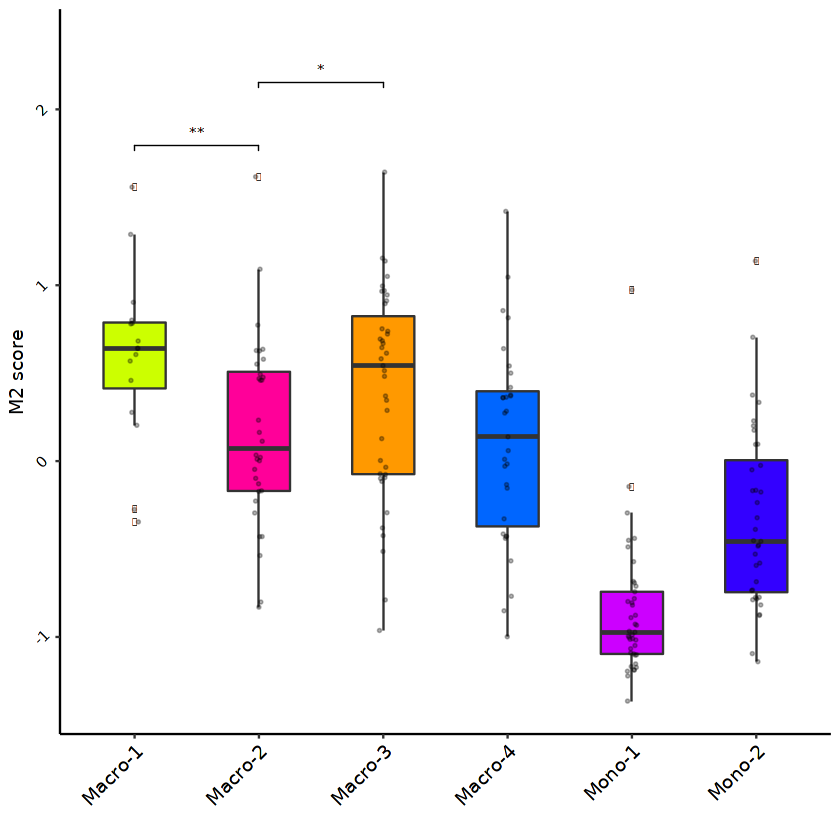

In [43]:
# M2 score 
ylab='M2 score'
cname=names(anoM2)

gs=c(glist$M2,'TREM2','SPP1')

df=Signature_score(anoM2[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=10,magnitude.normal = TRUE)

p2 = drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.45,height=2.5,width=2.4,sigl=c('Macro-1', 'Macro-2', 'Macro-3'))
p2

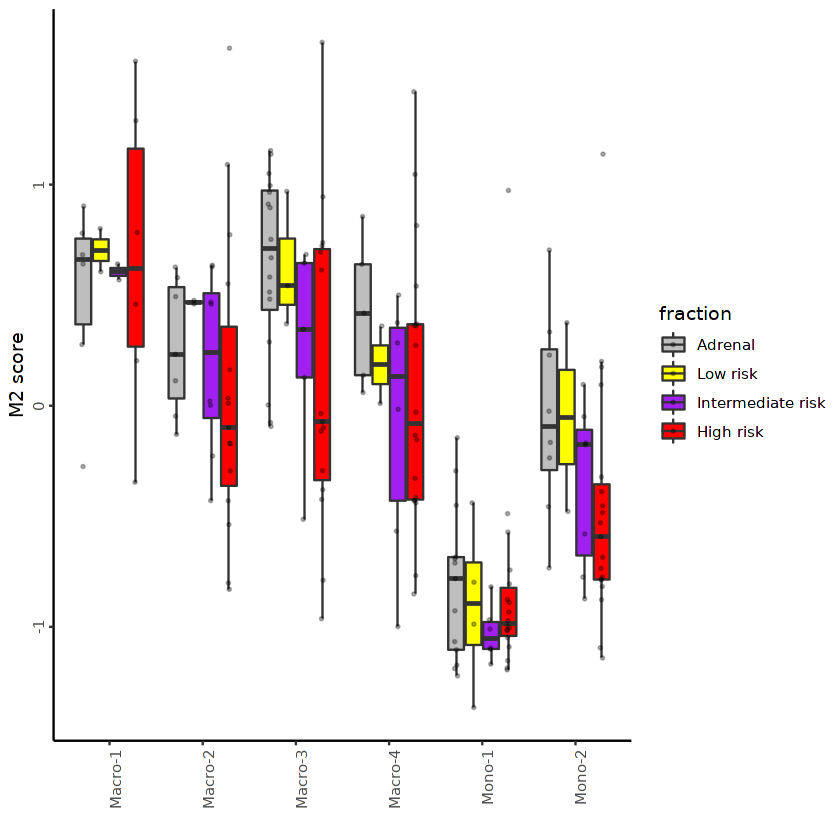

In [44]:
p <- ggplot(na.omit(df),aes(x=cell,y=score,dodge=fraction,fill=fraction))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+theme(legend.position="right")+
  scale_fill_manual(values=fraction.palette1)#+
# scale_y_continuous( expand=c(0, max(df$score) * 0.1), limits=c(0, (max(df$score) + max(df$score) * 0.05 )))  #expand=c(0, 0),

p1=p#+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02840 0.08628 0.10605 0.16371 0.52513 


Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”


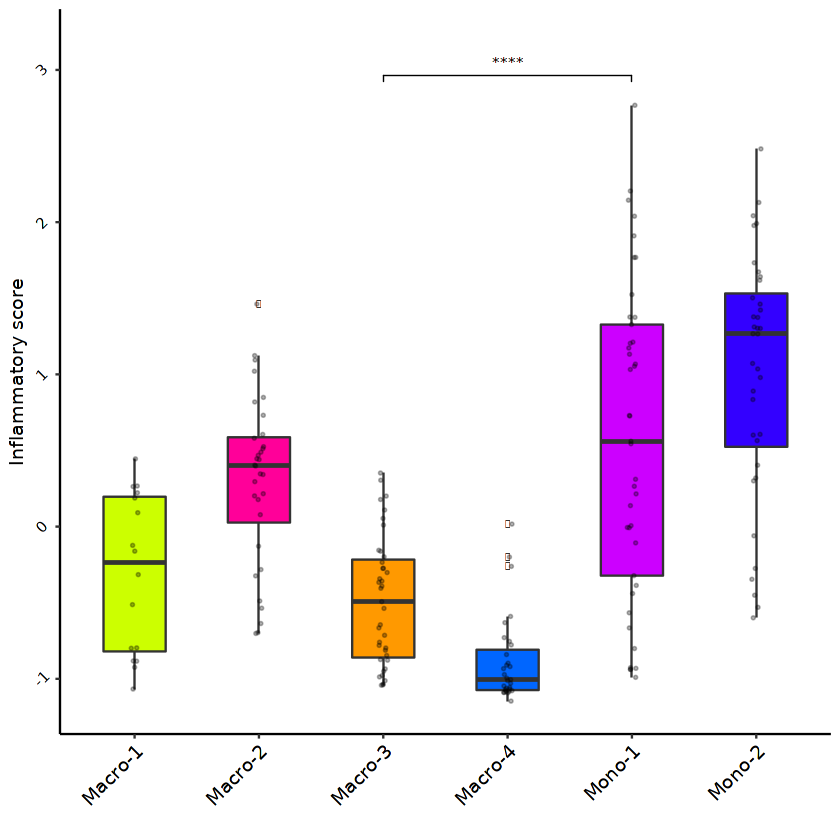

In [46]:
cname = intersect(names(stype),names(anoM2))
anoM2 = anoM2[cname]
ylab='Inflammatory score'
cname=names(anoM2)

gs=glist$TIM

gs = intersect(gs,colnames(sp2$counts))

df=Signature_score(anoM2[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=10,magnitude.normal = TRUE)
p1=drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.15,height=2.5,width=2.4,sigl=c('Mono-1', 'Macro-3'))

p1



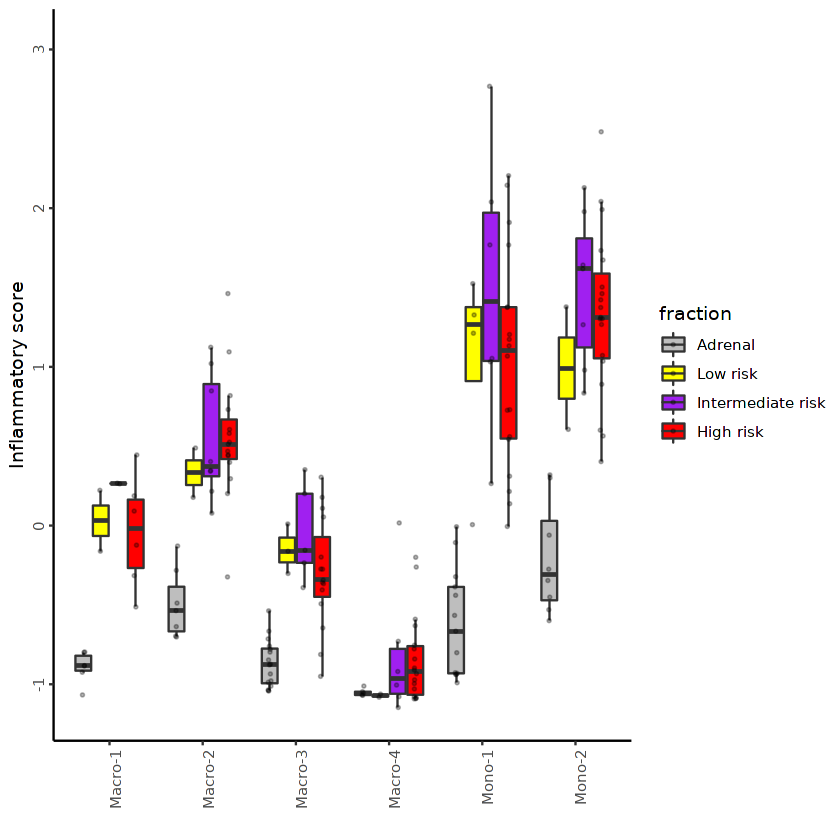

In [47]:
p <- ggplot(na.omit(df),aes(x=cell,y=score,dodge=fraction,fill=fraction))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+ylim(min(df$score),max(df$score)*1.1)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab(ylab)+theme(legend.position="right")+
  scale_fill_manual(values=fraction.palette1)#+
# scale_y_continuous( expand=c(0, max(df$score) * 0.1), limits=c(0, (max(df$score) + max(df$score) * 0.05 )))  #expand=c(0, 0),

p1=p#+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p1

In [49]:
exp = t(sp2$counts)
  
samp = con$getDatasetPerCell() %>% Toch()
samp=samp[samp %in% names(ss)]
table(samp)

cname.ninib = intersect(names(samp),names(anoM))
length(cname.ninib)  

anoM.ninib = anoM[cname.ninib]
anoM.ninib = anoM.ninib[grepl('Macro|Mono',anoM.ninib)] %>% Toch() %>% as.factor()

samp
NB02 NB09 NB11 NB12 NB13 NB15 NB16 NB17 NB18 NB19 NB20 NB23 NB24 NB26 NB34 NB37 
 330  374  274  483 2810  310  145  309  230  826  139  545 1432   60  380  151 

[1] 8715

In [52]:

gs = c('APOC1','TREM2','APOE','MMP9','TIMP3','CTSB','NPL','SLC1A3','GPNMB','IDH1')


tmp2=ScoreMatrix2(gs[1:10],exp,anoM.ninib,ssamp,anoM.ninib,plot=TRUE,file=paste(appname,'.ninib.heatmap.v22.png',sep=''),gap=TRUE,min.num.cell = 10)


ttype
NB02|Macro-1 NB02|Macro-2 NB02|Macro-3 NB02|Macro-4  NB02|Mono-1  NB02|Mono-2 
          25           11           18          151           42           36 
NB09|Macro-2 NB09|Macro-3 NB09|Macro-4  NB09|Mono-1  NB09|Mono-2 NB11|Macro-2 
          40           24           26          123           90           16 
NB11|Macro-4  NB11|Mono-1  NB11|Mono-2 NB12|Macro-1 NB12|Macro-2 NB12|Macro-3 
          30           30           37           26          113           27 
NB12|Macro-4  NB12|Mono-1  NB12|Mono-2 NB13|Macro-1 NB13|Macro-2 NB13|Macro-3 
          49           68           77          377          514          433 
NB13|Macro-4  NB13|Mono-1  NB13|Mono-2 NB15|Macro-2 NB15|Macro-3 NB15|Macro-4 
         238          310          231           22           18           23 
 NB15|Mono-1  NB15|Mono-2 NB16|Macro-2  NB16|Mono-1  NB16|Mono-2 NB17|Macro-2 
          84           32           25           32           18           87 
NB17|Macro-3 NB17|Macro-4  NB17|Mono-1  NB17|M

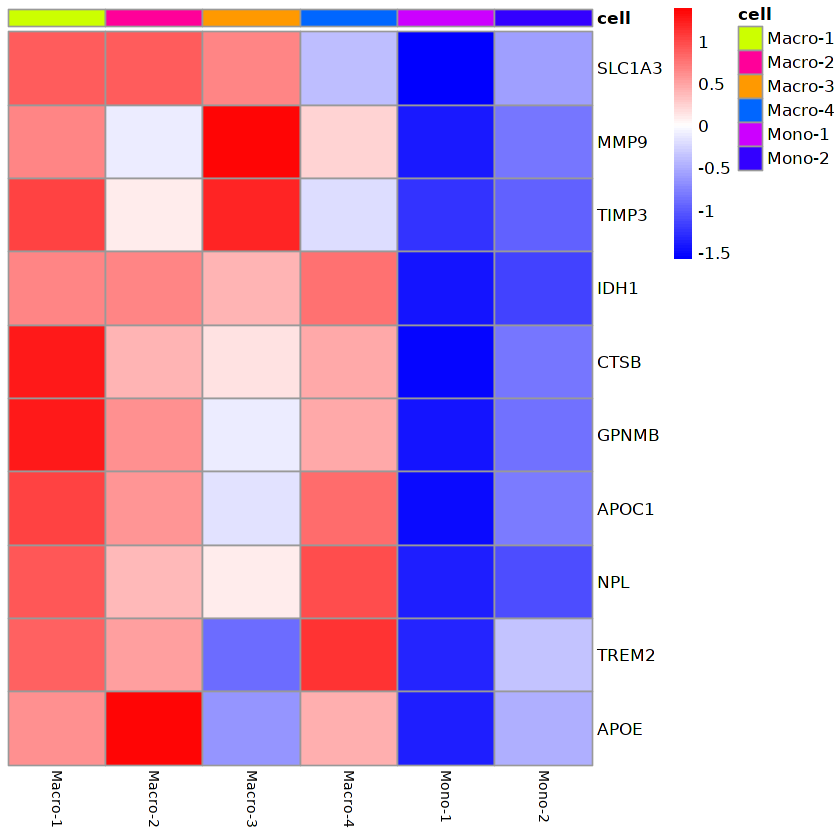

In [51]:

x1= tmp$exp
colano = tmp$ano
start.chrom = tmp$start.chrom
fn = colano[,1]

colnames(x1) = fn
rownames(colano) = fn
rgb.palette <- colorRampPalette(c("blue","white","red"), space = "rgb" )

anoc =list('cell'=anoM.pal[fn])
colnames(colano) = 'cell'

 aa=pheatmap::pheatmap(x1,annotation_col = colano,annotation_colors = anoc,show_rownames = T,show_colnames = T,width=3+0.1*ncol(x1),
              fontsize_col=8,gaps_col  = NULL,
              cluster_rows = FALSE, cluster_cols=FALSE,color=rgb.palette(100),height=3+0.1*nrow(x1),
              breaks = c(seq(min(x1),-0.01,length.out = 50),seq(0.01,max(x1),length.out = 50)))